Import the libraries

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals



%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
# These steps are typically always called.  The "matplotlib inline" is to display figures in this notebook itself 


import pandas as pd 
# pandas is a library for handling datasets; you will see some useful built-in functions in action

import os # to move around your operating system

import scipy as sp  # scientific computation library

from mpl_toolkits.mplot3d import axes3d # in case we need to plot in 3D z=f(x,y)
import seaborn as sns  # another package for pretty graphs

# Scikit-learn (sklearn) is a powerful and fairly comprehensive library of ML algorithms

from sklearn import datasets
from sklearn.neighbors.kde import KernelDensity

Defining the dataset

(50,)


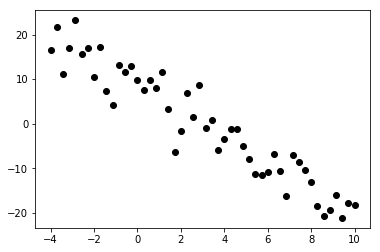

In [4]:
def f1(x, m, c): # y = m*x + c (ground truth function)
    return m*x + c 
xmin, xmax, npts = [-4, 10, 50]
X = np.linspace(xmin, xmax, npts) # defining domain of the function as a vector of 50 real numbers between 0 and 5
print(np.shape(X))
# Create data from ground truth function that is corrupted by additive Gaussian noise of mean 0 and std. dev. 4
y0 = f1(X, -3., 9.) + np.random.normal(0,scale=4, size=np.shape(X))  
plt.scatter(X, y0, marker='o', c='k')

Next step: The design matrix is formed by (1) assembling each input vector as a row and (2) adding a column of ones. In this case the input vector is a scalar. We will end up with a design matrix of size (2-times-N) where N is the number of data points. This sets up the linear equation  Aw=y .

In [8]:
def designmat1(Xmat):
    X = np.atleast_2d(Xmat).T
    col1 = np.ones(np.shape(X)[0]).reshape(np.shape(X)[0],1)
    X = np.concatenate((col1, X), axis=1) 
    return X

designmat1(X).shape

(50, 2)

### Find optimal weights by gradient descent

Find the weight vector  w  by minimising the length of the residual vector  r(w):=y−Aw  by gradient descent. From the lecture slides/tutorial exercises you should be able to verify that the function "gradsqloss" corresponds to the gradient of the average of squared residuals loss function.

In [15]:
def gradsqloss(Amat, y, wt):
    n, p = Amat.shape
    return (-2/n)*Amat.T.dot((y - Amat.dot(wt)))

def gradientDescent(Amat, y, winit, rate, num_iters):
    whistory = []
    meanrsshistory = []
    w = winit
    
    for i in range(num_iters):
        meanrss = np.square(y - Amat.dot(w)).mean()
        whistory.append(w)
        meanrsshistory.append(meanrss)
        grad = gradsqloss(Amat, y, w)
        w = w - rate * grad
    return w, np.asarray(whistory), np.asarray(meanrsshistory)

Text(0, 0.5, 'mean of sum of squares of residual')

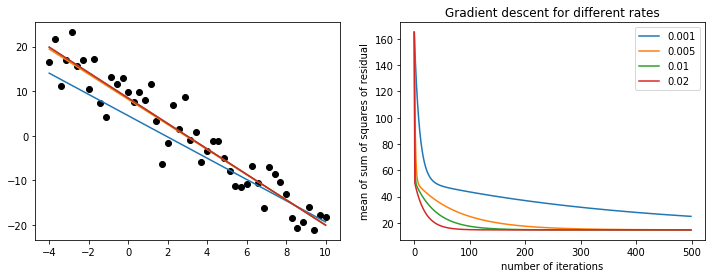

In [27]:
Xmat = designmat1(X)

n, p = Xmat.shape

# generate p random wts

w0 = np.random.randn(p)

num_iters = 500

rates = [.001,.005,.01,.02]

# test set data + plot

xinput = np.linspace(-4,10,100)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax[0].scatter(X,y0,marker='o',color='k')

for i, r in enumerate(rates):
    wfin, whist, meanlosstrace = gradientDescent(Xmat, y0,  w0, r, num_iters)
    ax[1].plot(meanlosstrace,label=r)
    ax[0].plot(xinput,wfin[0]+wfin[1]*xinput, label = r)


ax[1].legend() 
ax[1].set_title("Gradient descent for different rates")
ax[1].set_xlabel("number of iterations")
ax[1].set_ylabel("mean of sum of squares of residual")